<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

# Описание проекта

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Описание данных

* Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
* Целевой признак: количество страховых выплат клиенту за последние 5 лет.

# План работы

1. Загрузка данных.
2. Умножение матриц.
3. Алгоритм преобразования.
4. Проверка алгоритма.

## Загрузка данных

In [1]:
# импортируем библиотеки

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
# Сохраняем данные в переменную df

try:    
    df = pd.read_csv('insurance.csv')
except:    
    df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [3]:
df.sample(3)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
343,0,25.0,54900.0,1,0
1603,0,34.0,20500.0,0,0
3413,0,47.0,32900.0,2,1


In [4]:
df.info() # смотрим пропуски, типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.duplicated().sum() # дубликаты

153

In [6]:
df = df.drop_duplicates() # сносим дубликаты
df.shape

(4847, 5)

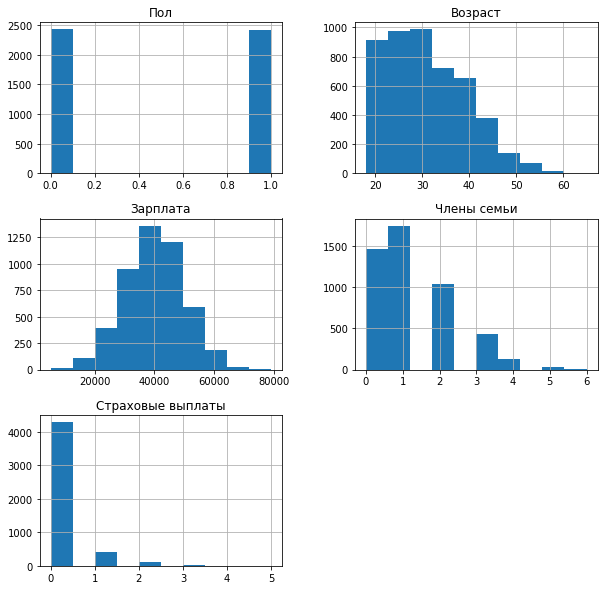

In [7]:
df.hist(figsize=(10, 10)) # распределения данных
None

Данные выглядят адекватно, выбросов не видно, оставим так.

In [8]:
# разобьем датафрейм на фичи и таргеты

Y = df['Страховые выплаты']
X = df.drop(['Страховые выплаты'], axis=1)

**Вывод:** 
* пропусков нет; 
* дубликаты удалены;
* аномальных значений подлежащих удалению тоже нет;
* выделен целевой признак.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 * a. Изменится. Приведите примеры матриц.
 * b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

**Ответ:** Не изменится.


**Обоснование:**

1. Предсказания вычисляются по формуле: $$\hat{y_0} = Xw = X(X^T X)^{-1} X^T y$$


2. Преобразуем признаки умножением на обратимую матрицу: $$X_1 = XA,$$ где $A$ - обратимая матрица


3. Новые предсказания: $$\hat{y_{1}} = X_1w = X_1(X_1^TX_1)^{-1} X_1^T y$$
 * Подставим XA(***отсюда переписал***): $$\hat{y_{1}} = XA((XA)^TXA)^{-1}(XA)^T y$$
 * Используем свойства матриц:
$$(AB)^T = B^TA^T$$$$(AB)^{-1} = B^{-1}A^{-1}$$
 * Тогда
$$\hat{y_{1}} = XA(A^TX^TXA)^{-1}A^TX^Ty$$
$$\hat{y_{1}} = XAA^{-1}(X^TX)^{-1}(A^T)^{-1}A^TX^Ty$$
$$\hat{y_{1}} = XE(X^TX)^{-1}EX^Ty$$
-----------------------------------------------------
$$\hat{y_{1}} = X(X^TX)^{-1}X^Ty => \hat{y_{1}} = \hat{y_0}$$ что и требовалось доказать!
 


Определим как связаны между собой параметры линейной регрессии   (**w**  и **w1**): 
$$w = (X^T X)^{-1} X^Ty$$
Тогда:
$$w_1 = (X_1^T X_1)^{-1} X_1^Ty$$
подставим ХА:
$$w_1 = ((XA)^T XA)^{-1} (XA)^Ty$$
$$w_1 = (A^TX^TXA)^{-1}A^TX^Ty$$
$$w_1 = A^{-1}(X^TX)^{-1}(A^T)^{-1}A^TX^Ty$$
$$w_1 = A^{-1}(X^TX)^{-1}EX^Ty$$
$$w_1 = A^{-1}(X^TX)^{-1}X^Ty$$
$$w_1 = A^{-1}w$$

Веса w1 и w связаны между собой равенством с поправкой на обратную матрицу А

**Вывод:** Если признаки умножают на обратимую матрицу, то качество линейной регрессии **не изменится**.

## Алгоритм преобразования

**Алгоритм**

1. Генерируем случайную матрицу А.
2. Вычисляем детерминант А.
2. Умножаем матрицу признаков Х на матрицу А.

**Обоснование**

Матрица признаков Х имеет размерность ***n x k***. Чтобы преобразованная матрица сохранила такую же размерность, матрица А должна иметь размерность ***k x k***. 

Также матрица должна быть обратима (см. предыдущий пункт). Для этого детерминант матрицы не должен быть нулевой.

## Проверка алгоритма

In [9]:
X.shape

(4847, 4)

In [10]:
# создаем случайную матрицу 4х4

A = np.random.RandomState(12).rand(4, 4)
A

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939],
       [0.01457496, 0.91874701, 0.90071485, 0.03342143],
       [0.95694934, 0.13720932, 0.28382835, 0.60608318],
       [0.94422514, 0.85273554, 0.00225923, 0.52122603]])

In [11]:
# проверим на обратимость

np.linalg.det(A) # считаем определитель

-0.39902918474634386

Определитель не равен нулю, а значит матрица обратима.

In [12]:
# Исходные признаки
X.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


In [13]:
# Преобразуем матрицу признаков

X1 = X @ A
X1.head() # преобразованные признаки

,0,1,2,3
0,47466.383041,6844.843752,14115.081190,30064.151188
1,36365.689452,5257.069309,10826.912555,23033.219617
2,20096.358736,2908.039412,5986.516143,12728.716093
3,39906.981847,5742.627859,11854.561849,25275.413090
4,24976.939939,3607.628253,7433.403343,15820.240651


In [14]:
model = LinearRegression()
res = cross_val_score(model, X, Y, scoring='r2', cv=3)
res1 = cross_val_score(model, X1, Y, scoring='r2', cv=3)

print('r2 метрика на исходных признаках', res.mean().round(5))
print('r2 метрика на преобразованных признаках', res1.mean().round(5))

r2 метрика на исходных признаках 0.42969
r2 метрика на преобразованных признаках 0.42969


**Вывод:** Признаки были преобразованы с помощью алгоритма. Далее было проведено сравнение метрик линейной регрессии на исходных и преобразованных признаках. Метрики совпадают, а значит теория подтвердилась практикой, следовательно можно шифровать данные таким образом, и на модель это не повлияет.

## Вывод

В данном исследовании была поставлена цель защитить персональные данные клиентов страховой компании таким образом, чтобы качество моделей машинного обучения при этом не ухудшилось.

Были выполнены следующие задачи:

1. Проанализированы исходные данные:
* пропусков и дубликатов не обнаружено
* аномальных значений для удаления нет
* выделен целевой признак
2. Теоретически доказано, что умножение матрицы признаков на обратимую матрицу не влияет на качество линейной регрессии.
3. Разработан алгоритм преобразования данных с помощью умножения на случайную обратимую матрицу.
4. Алгоритм протестирован на практике:
* качество линейной регрессии на исходных и преобразованных данных совпало (r2 метрика 0.42969)


Таким образом, в ходе исследования был предложен метод преобразования персональных данных, позволяющий сохранить качество моделей машинного обучения. Цель и задачи исследования можно считать выполненными.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования